# Factor cambiario HN - BCH
## Historico Factor Cambiario

In [6]:
from datetime import datetime
import requests as req
import xml.etree.ElementTree as ET 
import pandas as pd

BCH_URL="https://www.bch.hn/_api/web/lists/GetByTitle('LST-INDICADOR-TIPOCAMBIO')/items?$top=5000"

def getWsFactorCambiario():
	""" Extrayendo datos """
	res=req.get(BCH_URL,params={'Accept':'application/json; odata=verbose'})
	tree = ET.fromstring(res.content)
	return [(tree[i].getchildren()[21].getchildren()[0].getchildren()[7].text,tree[i].getchildren()[21].getchildren()[0].getchildren()[8].text,tree[i].getchildren()[21].getchildren()[0].getchildren()[9].text) for i in list(range(3,len(tree)))]

def getFactorCambiarioSinCambios():
	""" Generando el dataset """
	data=pd.DataFrame(getWsFactorCambiario())
	data=data.rename(columns={0:'Fecha',1:'Tipo',2:'Factor'})
	return data
  
def getFactorCambiario():
	""" Limpiando el dataset """
	data = getFactorCambiarioSinCambios()
	data['Fecha']=data['Fecha'].str.strip()
	data['Dia']=data['Fecha'].apply(lambda x: x.split(' ')[0])
	data['Fecha']=data['Fecha'].apply(lambda x: x.split(' ')[1])
	data['Fecha']=data['Fecha'].apply(lambda x: pd.to_datetime(x,format='%d/%m/%Y'))
	data['Factor']=data['Factor'].astype(float)
	data.loc[data['Tipo']=='Valor de Compra','Tipo']='Compra'
	data=data.sort_values(by='Fecha')
	return(data)

data=getFactorCambiario()
data.head()

c:\Users\juanr\Desktop\Repositorios\webscrapinghn\venv\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.
  if sys.path[0] == '':


,Fecha,Tipo,Factor,Dia
0,2021-02-09,Compra,24.0733,Martes
4,2021-02-09,Compra,25.0733,Martes
1,2021-02-10,Compra,24.0718,Miércoles
2,2021-02-11,Compra,24.0684,Jueves
3,2021-02-12,Compra,25.0647,Viernes


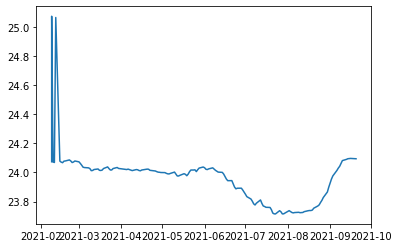

In [9]:
from matplotlib.pyplot import plot
plot(data['Fecha'],data['Factor'])